In [1]:
import numpy
import pandas as pd
import numpy as np
from numpy import arange
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn import preprocessing
from sklearn.decomposition import PCA

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# 1. Regression Analysis

In [2]:
#Load the dataset
df = pd.read_csv('auto-mpg.data',delim_whitespace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
396,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
397,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
398,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


In [3]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
car_name         object
dtype: object

In [4]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

## Question 1: Polynomial Regression

a. Fill in the missing values and remove the outliers of the dataset according to the data preprocessing instructions in Practical 01.

In [5]:
#We will apply the same data cleaning processes designed in Practical01
#Deleting the duplicated rows
df = df.drop_duplicates()

In [6]:
#Check if there is any null value in the dataset
df.isnull().values.any()

False

In [7]:
#Filling in the missing values in any of the columns using mean value
columns = df.columns
for i in columns:
    if '?' in df[i].unique():
        print("There is missing value existing in the column", i)

There is missing value existing in the column horsepower


<ipython-input-7-189ee73e88c6>:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if '?' in df[i].unique():


In [8]:
#Filling in the missing values in any of the columns using mean value
#Calculate the mean value of horsepower
sub_df = pd.DataFrame(df['horsepower'].loc[df['horsepower'] != '?'])
sub_df = sub_df.astype("float64")
mean_value = sub_df['horsepower'].mean()

#Using the mean value to filling in the missing value.
df['horsepower'].loc[df['horsepower'] == '?'] = mean_value

/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [9]:
df['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', 104.46938775510205, '100.0', '105.0', '175.0', '153.0',
       '180.0', '110.0', '72.00', '86.00', '70.00', '76.00', '65.00',
       '69.00', '60.00', '80.00', '54.00', '208.0', '155.0', '112.0',
       '92.00', '145.0', '137.0', '158.0', '167.0', '94.00', '107.0',
       '230.0', '49.00', '75.00', '91.00', '122.0', '67.00', '83.00',
       '78.00', '52.00', '61.00', '93.00', '148.0', '129.0', '96.00',
       '71.00', '98.00', '115.0', '53.00', '81.00', '79.00', '120.0',
       '152.0', '102.0', '108.0', '68.00', '58.00', '149.0', '89.00',
       '63.00', '48.00', '66.00', '139.0', '103.0', '125.0', '133.0',
       '138.0', '135.0', '142.0', '77.00', '62.00', '132.0', '84.00',
       '64.00', '74.00', '116.0', '82.00'], dtype=object)

In [10]:
df["horsepower"]=df["horsepower"].astype("float64")

<ipython-input-10-25c9015c04a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["horsepower"]=df["horsepower"].astype("float64")


In [11]:
#Remove the outliers of the dataset
#Here we will define a function call "dropOutlier()" to drop the ourliers among the continuous features
def dropOutlier(columns):
    Q1 = np.percentile(columns, 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(columns, 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1

    #Outlier handling, set those value of outliers to upper bound/ lower bound values
    columns.loc[(columns > (Q3+1.5*IQR))] = (Q3+1.5*IQR)
    columns.loc[(columns < (Q1-1.5*IQR))] = (Q1-1.5*IQR)

In [12]:
#We have to select the continuous features
continuous_columns = ["mpg", "displacement", "horsepower", "weight", "acceleration"]

for i in continuous_columns:
    dropOutlier(df[i])

/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
/Users/oujunhao/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

b. Generate a simple linear regression model that predicts mpg based on ‘horsepower’ alone (use sklearn.linear_model library). What are the training and test RMSE and R2 values when a test set has 30% of the samples?

In [13]:
#Generate a dataset only have 'mpg' and 'horsepower'.
df_b = df[["mpg","horsepower"]]
df_b

,mpg,horsepower
0,18.0,130.0
1,15.0,165.0
2,18.0,150.0
3,16.0,150.0
4,17.0,140.0
...,...,...
395,27.0,86.0
396,44.0,52.0
397,32.0,84.0
398,28.0,79.0


In [14]:
#This function is used repeatedly to compute all metrics
def printMetrics(testActualVal, predictions):
    #classification evaluation measures
    print("RMSE: ", metrics.mean_squared_error(testActualVal, predictions)**0.5)
    print("R2: ", metrics.r2_score(testActualVal, predictions))
    print('\n==============================================================================')

In [15]:
#Create X and y and split the dataset into training set and testing set.
y = pd.DataFrame(df_b["mpg"])
X = pd.DataFrame(df_b["horsepower"])
y=y.astype("float64")
X=X.astype("float64")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [16]:
# Train a linear regression model fitting with the training set.
linreg = LinearRegression().fit(X_train, y_train)

In [17]:
#RMSE and R2 values of training set
printMetrics(y_train,linreg.predict(X_train))

RMSE:  4.968228811666813
R2:  0.6013670637344914



In [18]:
#RMSE and R2 values of testing set
printMetrics(y_test,linreg.predict(X_test))

RMSE:  4.55640823392892
R2:  0.6449129131368351



c. Generate a group of polynomial models (use sklearn.preprocessing. PolynomialFeatures) that predict mpg based on the ‘horsepower’ alone. The models should have degrees of 2, 5, 10, and 20. For each model, find training/test RMSE and R2 values.

In [19]:
test_list = [2,5,10,20]

for i in test_list:
    poly = PolynomialFeatures(i)
    
    X_train_poly = pd.DataFrame(poly.fit_transform(X_train))
    X_test_poly = pd.DataFrame(poly.fit_transform(X_test))
    
    linreg = LinearRegression().fit(X_train_poly, y_train)
    
    print("Metrics Evaluation of training set when degree is", i, ": ")
    printMetrics(y_train,linreg.predict(X_train_poly))
    
    print("Metrics Evaluation of testing set when degree is", i, ": ")
    printMetrics(y_test,linreg.predict(X_test_poly))

Metrics Evaluation of training set when degree is 2 : 
RMSE:  4.582585366180658
R2:  0.6608505412524366

Metrics Evaluation of testing set when degree is 2 : 
RMSE:  4.237366024814918
R2:  0.6928987507056061

Metrics Evaluation of training set when degree is 5 : 
RMSE:  4.562017923953062
R2:  0.6638880333467854

Metrics Evaluation of testing set when degree is 5 : 
RMSE:  4.156963030578296
R2:  0.7044425252117026

Metrics Evaluation of training set when degree is 10 : 
RMSE:  4.552071203145417
R2:  0.665352107924976

Metrics Evaluation of testing set when degree is 10 : 
RMSE:  4.161504653769066
R2:  0.7037963592815212

Metrics Evaluation of training set when degree is 20 : 
RMSE:  5.850104076756782
R2:  0.4472901739990227

Metrics Evaluation of testing set when degree is 20 : 
RMSE:  5.253519689736195
R2:  0.5279474461346594



d. Plot a scatter diagram between mpg and ‘horsepower’ with all the fitted linear and nonlinear models. Explain what will happen when the model complexity is increased. Which model is better? Explain your answer.

In [20]:
def linear_fit(x, a, b):
    return a*x + b

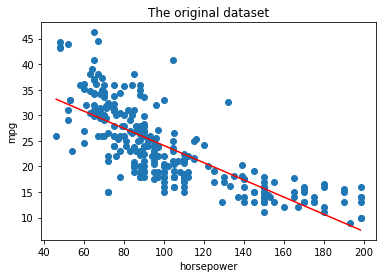

In [21]:
#Plot the scatter diagram between mpg and 'horsepower' of original data set
plt.scatter(X_train,y_train)

# Fit linear regression via least squares with numpy.polyfit
# It returns an slope (b) and intercept (a)
#deg=1 means linear fit (i.e. polynomial of degree 1)
a, b = np.polyfit(X_train['horsepower'].values.tolist(), y_train['mpg'].values.tolist(), deg=1)
x_line = arange(min(X_train['horsepower'].values.tolist()), max(X_train['horsepower'].values.tolist()), 0.1)
y_line = linear_fit(x_line, a, b)
plt.plot(x_line, y_line, color='red')


plt.xlabel('horsepower')
plt.ylabel('mpg')
plt.title('The original dataset')
plt.show()

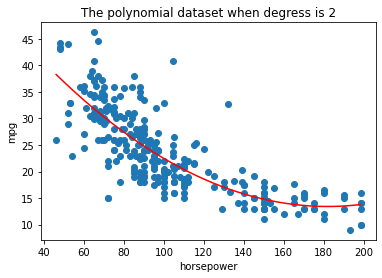

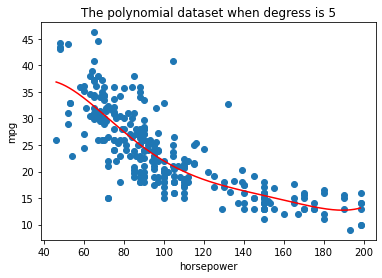

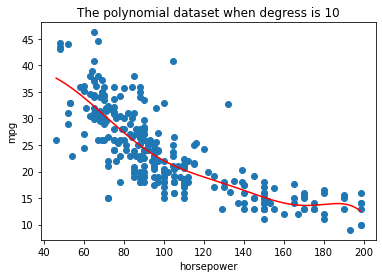

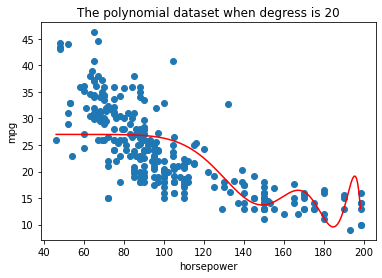

In [22]:
for i in test_list:
    poly = PolynomialFeatures(i)
    X_train_poly = pd.DataFrame(poly.fit_transform(X_train))
    linreg = LinearRegression().fit(X_train_poly, y_train)
    coefficient = linreg.coef_[0]
    intercept = linreg.intercept_
    
    x_line = arange(min(X_train['horsepower'].values.tolist()), max(X_train['horsepower'].values.tolist()), 0.1)
    y_line = intercept
    
    for j in range(1,i+1):
        y_line = y_line + coefficient[j] * x_line**j

    plt.scatter(x=X_train,y=y_train)
    plt.plot(x_line, y_line, color='red')
    plt.xlabel('horsepower')
    plt.ylabel('mpg')
    plt.title(f'The polynomial dataset when degress is {i}')
    plt.show()

## Question 2: Multiple Linear Regression

a. Predict mpg based on ‘horsepower', 'displacement', 'weight' and 'acceleration'. What are the RMSE and R2 values? Do you need to normalise the data?

In [23]:
#Create X and y and split the dataset into training set and testing set.
y = pd.DataFrame(df["mpg"])
X = pd.DataFrame(df[["horsepower","displacement","weight","acceleration"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [24]:
# Train a linear regression model fitting with the training set.
multiple_linreg = LinearRegression().fit(X_train, y_train)

In [25]:
#RMSE and R2 values of training set
printMetrics(y_train,multiple_linreg.predict(X_train))

RMSE:  4.376032378196196
R2:  0.6907348000244328



In [26]:
#RMSE and R2 values of testing set
printMetrics(y_test,multiple_linreg.predict(X_test))

RMSE:  3.8465450493024615
R2:  0.7469354750814894



“Normalizing” a vector most often means dividing by a norm of the vector. It also often refers to rescaling by the minimum and range of the vector, to make all the elements lie between 0 and 1 thus bringing all the values of numeric columns in the dataset to a common scale. The goal of normalization is to change the values of numeric columns in the dataset to a common scale, without distorting differences in the ranges of values. For machine learning, every dataset does not require normalization. It is required only when features have different ranges.

Resource from: https://towardsai.net/p/data-science/how-when-and-why-should-you-normalize-standardize-rescale-your-data-3f083def38ff

In [27]:
#We will try to normalize the the data and see if it will impact the RMSE and R2 values.
scaler = preprocessing.StandardScaler().fit(X)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

# Train a linear regression model fitting with the normalised data set.
multiple_linreg_normalised = LinearRegression().fit(X_scaled_train, y_train)

In [28]:
#RMSE and R2 values of training set
printMetrics(y_train,multiple_linreg_normalised.predict(X_scaled_train))

RMSE:  4.376032378196196
R2:  0.6907348000244328



In [29]:
#RMSE and R2 values of testing set
printMetrics(y_test,multiple_linreg_normalised.predict(X_scaled_test))

RMSE:  3.846545049302461
R2:  0.7469354750814894



As we can see above, RMSE and R2 values based on the normalised dataset make no difference with the RMSE and R2 values from original dataset. Therefore, we believe it is unnecessary to normalise the data.

b. Predict mpg based on the first PCA component of the above four variables. Do you see any accuracy reduction?

In [30]:
# define PCA transform
pca = PCA(n_components=1) # estimate only 2 PCs
# prepare the on dataset
df_pca = df[['weight','acceleration','displacement','horsepower']]

# project the original data into the PCA space
df_pca_new = pd.DataFrame(pca.fit_transform(df_pca),columns=['component1'])

df_pca_new

,component1
0,543.661914
1,737.520308
2,478.166753
3,473.587551
4,488.868464
...,...
393,-185.894479
394,-847.302269
395,-677.940365
396,-352.248728


In [31]:
y = pd.DataFrame(df["mpg"])
X = df_pca_new
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [32]:
#Train a linear regression model using pca component as variable.
linreg_pca = LinearRegression().fit(X_train, y_train)

In [33]:
#RMSE and R2 values of training set
printMetrics(y_train,linreg_pca.predict(X_train))

RMSE:  4.481298870298959
R2:  0.6756769475455848



In [34]:
#RMSE and R2 values of training set
printMetrics(y_test,linreg_pca.predict(X_test))

RMSE:  3.9407024864681612
R2:  0.7343945887337243



Through the comparison, we can see that RMSE slightly increased and R2 values slightly decreased when using first PCA component to predict the mpg. Overall, the performance slightly went down.

c. Add origin and cylinders as categorical variables appropriately into the prediction model and discuss the accuracy improvement.

In [35]:
# prepare the on dataset
df_new = df[['weight','acceleration','displacement','horsepower', 'origin', 'cylinders']]
df_new['origin']=df_new['origin'].astype('category')
df_new['cylinders']=df_new['cylinders'].astype('category')

# Considering that we will involve categorical features into the model training, we choose to set up dummies features.
df_new = pd.get_dummies(df_new)
df_new

<ipython-input-35-2a6c07765767>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['origin']=df_new['origin'].astype('category')
<ipython-input-35-2a6c07765767>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cylinders']=df_new['cylinders'].astype('category')


,weight,acceleration,displacement,horsepower,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8
0,3504.0,12.0,307.0,130.0,1,0,0,0,0,0,0,1
1,3693.0,11.5,350.0,165.0,1,0,0,0,0,0,0,1
2,3436.0,11.0,318.0,150.0,1,0,0,0,0,0,0,1
3,3433.0,12.0,304.0,150.0,1,0,0,0,0,0,0,1
4,3449.0,10.5,302.0,140.0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
395,2790.0,15.6,140.0,86.0,1,0,0,0,1,0,0,0
396,2130.0,22.1,97.0,52.0,0,1,0,0,1,0,0,0
397,2295.0,11.6,135.0,84.0,1,0,0,0,1,0,0,0
398,2625.0,18.6,120.0,79.0,1,0,0,0,1,0,0,0


In [36]:
y = pd.DataFrame(df["mpg"])
X = df_new
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [37]:
#Train a linear regression model involving 2 categorical features.
linreg_categorical = LinearRegression().fit(X_train, y_train)

In [38]:
#RMSE and R2 values of training set
printMetrics(y_train,linreg_categorical.predict(X_train))

RMSE:  3.987371166453104
R2:  0.7432305631463025



In [39]:
#RMSE and R2 values of testing set
printMetrics(y_test,linreg_categorical.predict(X_test))

RMSE:  3.599769452814079
R2:  0.778364666527423



Compared with the previous results generated from the linear regression only taking 'weight','acceleration','displacement','horsepower' as variables, RMSE values have considerable decrease for both training and test set. And the R2 values also experienced a increase, which indicates that involving these two categorical features improves the performance of the model.

d. By adding “model_year” as an ordinal variable and “car_name” as a categorical variable do you see any improvement in the model performance?

In [40]:
df["model_year"].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

Based on the characteristics of the feature 'model_year' we decided to treat this ordinal variable as the categorical feature.

In [41]:
# prepare the on dataset
df_new = df[['weight','acceleration','displacement','horsepower', 'origin', 'cylinders', 'model_year', 'car_name']]
df_new['origin']=df_new['origin'].astype('category')
df_new['cylinders']=df_new['cylinders'].astype('category')

# Considering that we will involve categorical features into the model training, we choose to set up dummies features.
df_new = pd.get_dummies(df_new)
df_new

<ipython-input-41-c9400f8cd0a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['origin']=df_new['origin'].astype('category')
<ipython-input-41-c9400f8cd0a2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['cylinders']=df_new['cylinders'].astype('category')


,weight,acceleration,displacement,horsepower,model_year,origin_1,origin_2,origin_3,cylinders_3,cylinders_4,...,car_name_volvo 145e (sw),car_name_volvo 244dl,car_name_volvo 245,car_name_volvo 264gl,car_name_volvo diesel,car_name_vw dasher (diesel),car_name_vw pickup,car_name_vw rabbit,car_name_vw rabbit c (diesel),car_name_vw rabbit custom
0,3504.0,12.0,307.0,130.0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,3693.0,11.5,350.0,165.0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3436.0,11.0,318.0,150.0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3433.0,12.0,304.0,150.0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3449.0,10.5,302.0,140.0,70,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2790.0,15.6,140.0,86.0,82,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
396,2130.0,22.1,97.0,52.0,82,0,1,0,0,1,...,0,0,0,0,0,0,1,0,0,0
397,2295.0,11.6,135.0,84.0,82,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
398,2625.0,18.6,120.0,79.0,82,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
y = pd.DataFrame(df["mpg"])
X = df_new
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)

In [43]:
#Train a linear regression model involving 2 categorical features.
linreg_categorical = LinearRegression().fit(X_train, y_train)

In [44]:
#RMSE and R2 values of training set
printMetrics(y_train,linreg_categorical.predict(X_train))

RMSE:  0.7190143631174687
R2:  0.9916507948475184



In [45]:
#RMSE and R2 values of testing set
printMetrics(y_test,linreg_categorical.predict(X_test))

RMSE:  3.5833024484705605
R2:  0.7803877529558636



From the metrics above, we can see that RMSE and R2 value from training set do improve significantly as the R2 value is as high as 99.17%. However, this could be a overfitting situation since the R2 value from the testing set is only 78.04%, which is only slightly higher than the R2 value from question c. Therefore, we conclude that involving the 'model_year' and 'car_name' have limited improvement in the model performance.

# Part B
<b>Please note that code and report are all included in this part.

1. Create a new column for pre-processed data-frame in Q1 (a) called ‘FEGroup’ to categorise cars as “high-fuel” and “low-fuel” consumption. Allocate 10% of cars having the lowest mpg (use pandas qcut function) into the ‘high-fuel’ consumption class. What is the base accuracy? The same question for the case where all cars are classified as ‘low-fuel’.

In [46]:
#Check the 'df' dataframe.
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
396,44.0,4,97.0,52.0,2130.0,22.1,82,2,vw pickup
397,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
398,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


In [47]:
#Create a new column
labels=['high-fuel', 'low-fuel']
df['FEGroup'] = pd.qcut(df['mpg'], [0, .1, 1], labels=labels)
df

<ipython-input-47-317262847494>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FEGroup'] = pd.qcut(df['mpg'], [0, .1, 1], labels=labels)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name,FEGroup
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,low-fuel
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,low-fuel
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,low-fuel
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,low-fuel
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,low-fuel
...,...,...,...,...,...,...,...,...,...,...
395,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl,low-fuel
396,44.0,4,97.0,52.0,2130.0,22.1,82,2,vw pickup,low-fuel
397,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage,low-fuel
398,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger,low-fuel


In [48]:
#Calculate the proportion of high fuel
high_fuel = df['FEGroup'].loc[df['FEGroup']=="high-fuel"].shape[0]/df['FEGroup'].shape[0]
high_fuel

0.1306532663316583

In [49]:
#Calculate the proportion of low fuel
low_fuel = df['FEGroup'].loc[df['FEGroup']=="low-fuel"].shape[0]/df['FEGroup'].shape[0]
low_fuel

0.8693467336683417

From the result above, we can see that the base accuracy for 'high-fuel' is 0.13, and the base accuracy for 'low-fuel' is 0.87. And we can conclude that if all the cars are all classified as low-fuel, the accuracy will be <b>86.93%

2. Using sklearn.tree library, generate a decision tree based on ‘horsepower', 'weight', 'acceleration', ‘cylinders’ and ‘origin’. Using information gain (entropy) as the splitting criterion, set max_depth to 3 while leaving everything else to their default values.

In [50]:
#Set the X, y dataset
X = pd.DataFrame(df[['horsepower', 'weight', 'acceleration', 'cylinders', 'origin']])
y = pd.DataFrame(df['FEGroup'])

In [51]:
#Define a desicion tree classfier
dtc = DecisionTreeClassifier(criterion='entropy',max_depth = 3)

As shown above, the decision tree classifier has been defined as the criterion is 'entropy' and the max_depth is 3.

3. Find the training and test accuracies when the data is split into 70% for training and 30% for testing. (Hint: use np.random.seed(42)). Plot the resulting decision tree using sklearn plot_tree function. Discuss the classification rules in your report.

In [52]:
#Split the train/test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=np.random.seed(42))

In [53]:
#Fit the model
dtc_trainer = dtc.fit(X_train,y_train)

In [54]:
#Predict the testing set
dtc_trainer.predict(X_test)

array(['low-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'high-fuel', 'low-fuel', 'low-fuel',
       'high-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'high-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'high-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'high-fuel', 'low-fuel', 'low-fuel', 'high-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'high-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'high-fuel', 'low-fuel',
       'high-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel', 'low-fuel',
       'low-fuel', 'low-fuel', 'high-fuel', 'low-fuel

In [55]:
#Check the accuracy of the model
dtc_trainer.score(X_test, y_test)

0.9

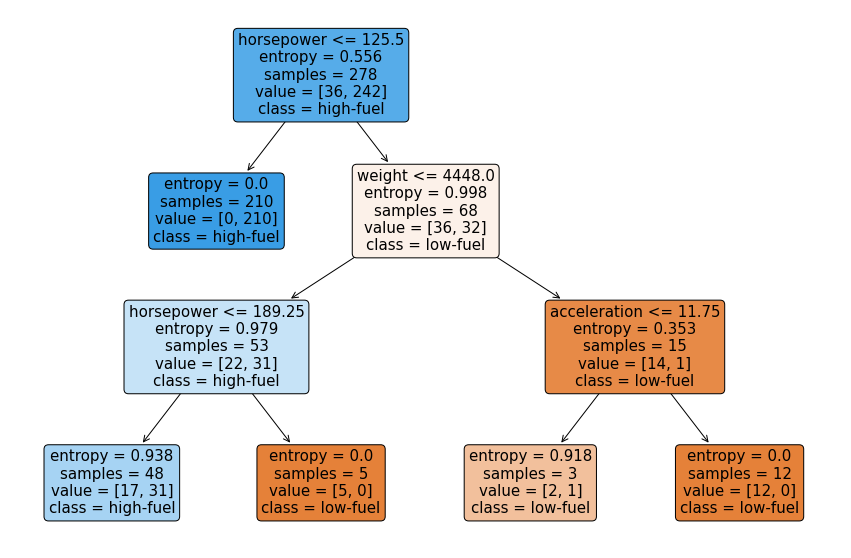

In [56]:
#Plot the resulting decision tree
X_features = X.columns
plt.figure(figsize=(15,10)) 
tree.plot_tree(dtc_trainer, feature_names=X_features, fontsize = 15,
                      class_names=['low-fuel','high-fuel'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

as we can see above, the accuracy (R2) of our decision tree classifier based on the testing dataset is 0.9; and the tree plot shows the classification rules of how values being classified as high-fuel/low-fuel.

Inicially, if 'hoursepower' is less or equal to 125.5, value will be classified as 'high-fuel'; else, 'weight' will be checked, if it is less or equal to 4448.0, we will check 'horsepower' again, if 'horsepower' <= 189.25, value will be classified as high-fuel, else, it will be classified as low-fuel. And when 'weight' is greater than 4448.0, we will check 'acceleration', and no matter what value is in 'acceleration', the instance will be classified as 'low-fuel'.

4. Train other decision trees, but this time with max_depth set to 3, 5, 8, respectively. Compare the results of these 3 DTs with the previous model. Explain the problem of measuring accuracy in an imbalance class problem, such as this one.

In [57]:
dtc5 = DecisionTreeClassifier(criterion='entropy',max_depth = 5)
dtc8 = DecisionTreeClassifier(criterion='entropy',max_depth = 8)

In [58]:
dtc_trainer5 = dtc5.fit(X_train,y_train)
dtc_trainer8 = dtc8.fit(X_train,y_train)

In [59]:
dtc_trainer5.score(X_test, y_test)

0.8833333333333333

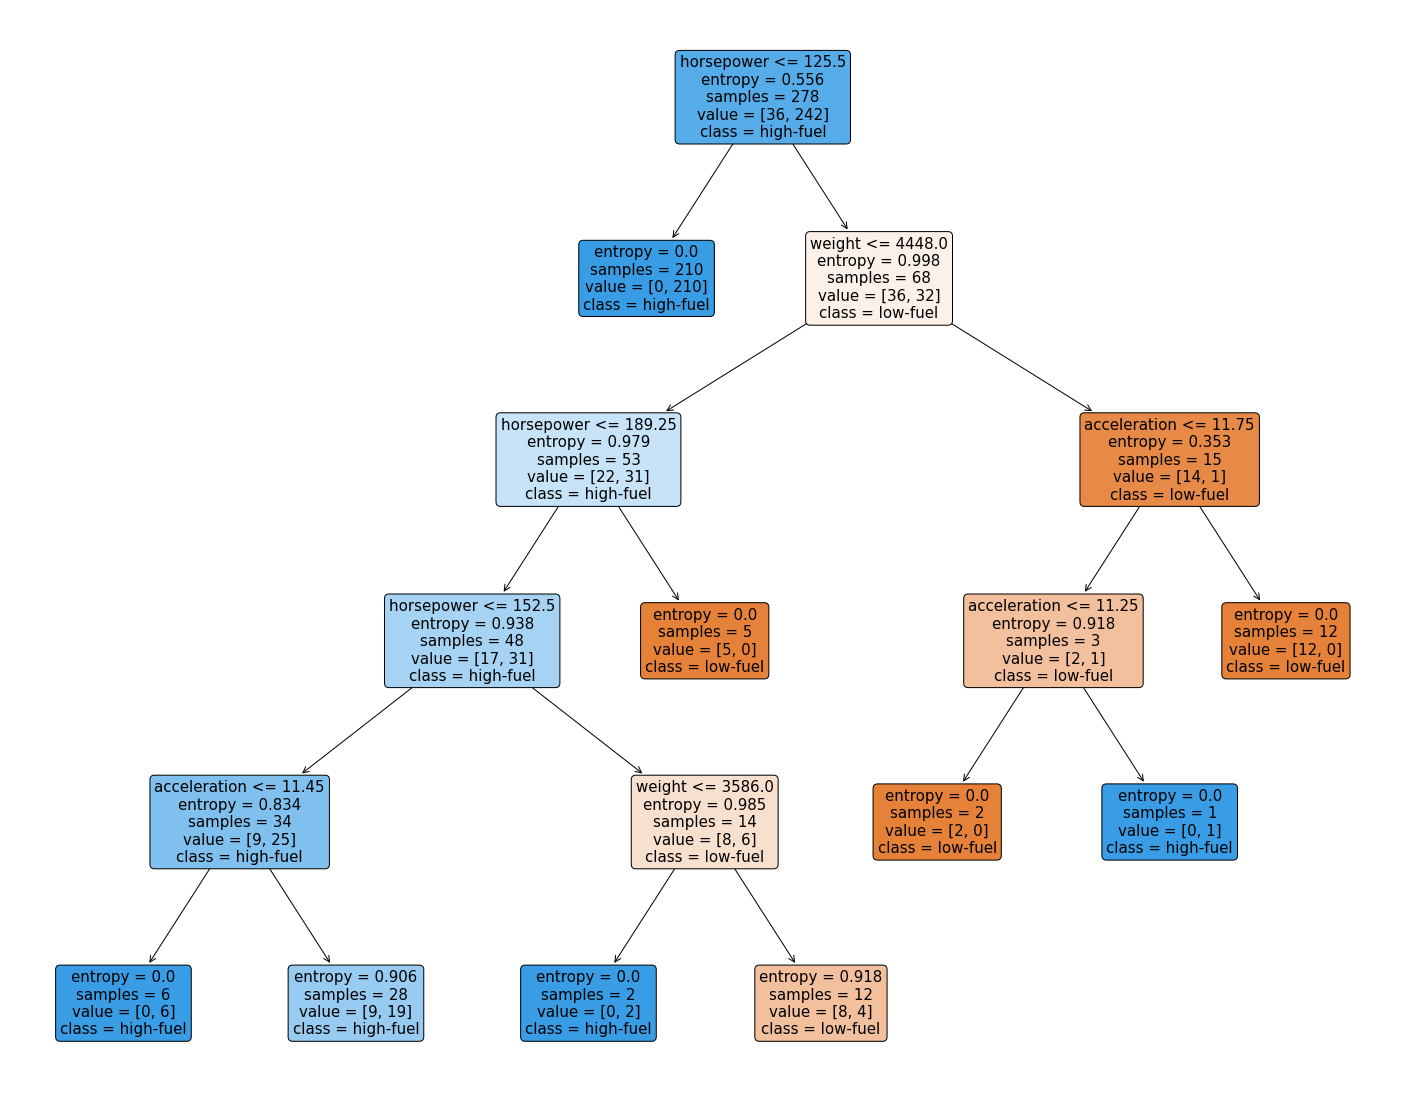

In [60]:
X_features = X.columns
plt.figure(figsize=(25,20)) 
tree.plot_tree(dtc_trainer5, feature_names=X_features, fontsize = 15,
                      class_names=['low-fuel','high-fuel'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

In [61]:
dtc_trainer8.score(X_test, y_test)

0.85

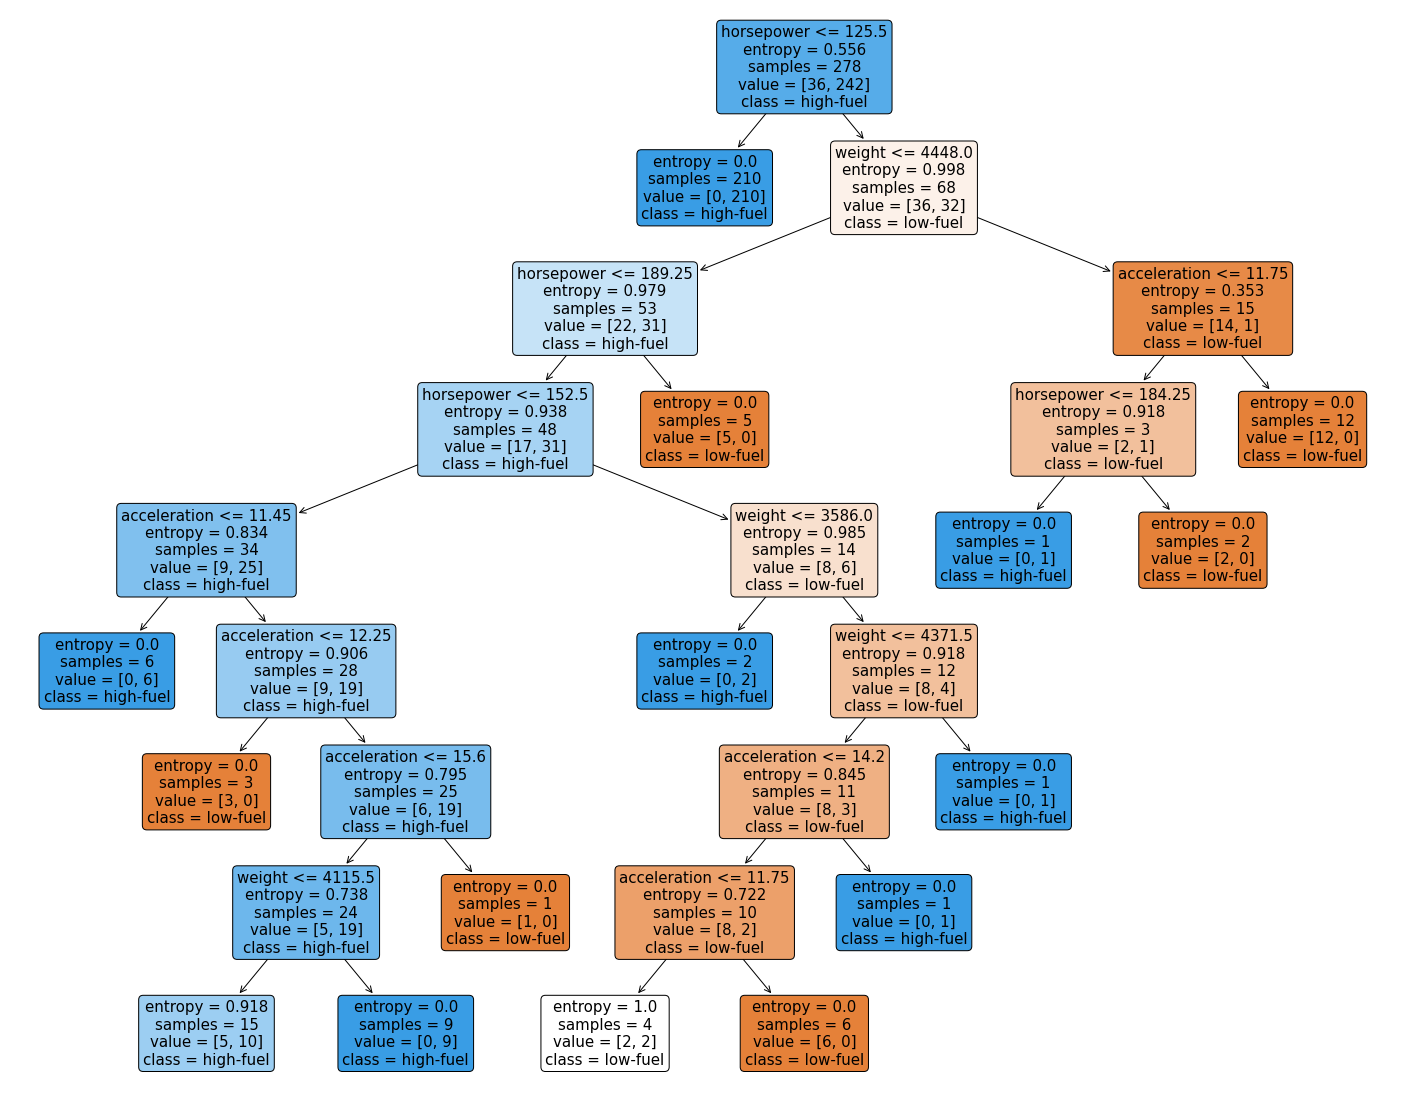

In [62]:
X_features = X.columns
plt.figure(figsize=(25,20)) 
tree.plot_tree(dtc_trainer8, feature_names=X_features, fontsize = 15,
                      class_names=['low-fuel','high-fuel'],  
                      filled=True, rounded=True) 
None # supressing the verbose return from plot_tree

From the results above, we can conclude that the accuracy slightly decrese when the 'max_depth' grows from 3 to 5, then to 8. Initially the accuracy was 0.9 when max_depth=3. However, when max_depth=8, the accuracy is only 0.85.

The tree plots for two decision tree classifiers are also shown above.

<b> Discussion of imbalance classification

In [63]:
print("The proportion of 'high-fuel' in training set is" ,y_train['FEGroup'].loc[y_train['FEGroup']=="high-fuel"].shape[0]/y_train['FEGroup'].shape[0])

The proportion of 'high-fuel' in training set is 0.12949640287769784


Imbalanced classification refers to a classification predictive modeling problem where the number of examples in the training dataset for each class label is not balanced. As we can see above, the proportion of value of 'high-fuel' is only 0.129 in the training set, while 'low-fuel' account 0.871. 

Based on my research, imbalanced classicification in training set will cause us only having uneven data representations in which the minority class is usually the more important one and hence we require methods to improve its recognition rates. This issue poses a serious challenge to predictive modeling because learning algorithms will be biased towards the majority class. Hence, using a machine learning model where the training set result is deviate to 'low-fuel' could cause a problem that the model is more clined to give a 'low-fuel' prediction because of the bias.



<b>How to handle an imbalanced dataset

- Data approach

It concentrates on modifying the training set to make it suitable for a standard learning algorithm. This can be done by balancing the distributions of the dataset which can be categorized in two ways: Oversampling and Undersampling 

- Algorithm approach

This approach concentrates on modifying existing models to alleviate their bias towards the majority groups. The most popular techniques are cost-sensitive approaches (weighted learners)

- hybrid approach

When it comes to dealing with imbalanced classification data, some works proposed hybridization of sampling and cost-sensitive learning. In other words, combining both data and algorithm level approaches. This idea of two-stage training that merges data-level solutions with algorithm-level solutions.

Resource from:
- https://machinelearningmastery.com/what-is-imbalanced-classification/
- https://neptune.ai/blog/how-to-deal-with-imbalanced-classification-and-regression-data